https://shapely.readthedocs.io/en/stable/manual.html

https://www.cnblogs.com/giserliu/p/4993697.html

`pip install shapely`

In [553]:
import numpy as np
from shapely.geometry import Point, LineString, Polygon, box
from shapely.geometry import LinearRing, MultiPoint, MultiLineString, MultiPolygon

# Attributes

### area 返回面积

In [554]:
Point(0.0, 0.0).buffer(10.0).area

313.6548490545941

### bounds 对象边界

In [555]:
Point(0.0, 0.0).buffer(10.0).bounds

(-10.0, -10.0, 10.0, 10.0)

### boundary 对象边缘

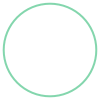

In [556]:
Point(0.0, 0.0).buffer(10.0).boundary

### length 长度

In [557]:
Point(0.0, 0.0).buffer(10.0).length

62.80662313909506

### coords 坐标值

In [558]:
list(Point(0.0, 0.0).coords)

[(0.0, 0.0)]

### centroid 返回中心点

POINT (1 0.9999999999999997)


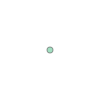

In [559]:
print(Point(1.0, 1.0).buffer(10.0).centroid)
Point(1.0, 1.0).buffer(10.0).centroid

### minimum_clearance 返回可以移动节点以生成无效几何体的最小距离

这可以被认为是一个几何体鲁棒性的度量，其中最小间隙值越大，表示几何体越坚固。如果几何图形（例如点）不存在最小间隙，则将返回 math.infinity

In [560]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

1.0

### geom_type 返回几何类型

In [561]:
Point(0, 0).geom_type

'Point'

## distance 返回到另一个几何对象的最小距离

In [562]:
Point(0, 0).distance(Point(1, 0))

1.0

## hausdorff_distance 返回到另一个几何对象的Hausdorff距离（float）。两个几何体之间的Hausdorff距离是任意一个几何体上的一个点与另一个几何体上的最近点之间的最远距离

In [563]:
point = Point(1, 1)

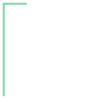

In [564]:
line = LineString([(2, 0), (2, 4), (3, 4)])
line

In [565]:
point.hausdorff_distance(line)

3.605551275463989

In [566]:
point.distance(Point(3, 4))

3.605551275463989

## representative_point 返回一个可以保证在几何对象内的廉价计算点

注意：这通常与质心不同。

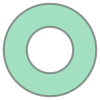

In [567]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut

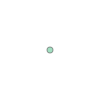

In [568]:
donut.centroid

In [569]:
donut.centroid.wkt

'POINT (0.0000000000000001 0)'

In [570]:
donut.representative_point().wkt

'POINT (1.4975923633360986 0.0490085701647802)'

# Pointer

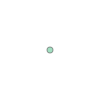

In [571]:
pointer = Point(0.0, 0.0)
pointer

## 点的面积和长度属性为0

In [572]:
point.area

0.0

In [573]:
point.length

0.0

## 点的边界是均为0的元组

In [574]:
point.bounds

(1.0, 1.0, 1.0, 1.0)

## 点的坐标值可以使用 coords, x, y 获取

In [575]:
list(point.coords)

[(1.0, 1.0)]

In [576]:
point.x

1.0

In [577]:
point.y

1.0

## Point构造函数还接受另一个Point实例，从而生成一个副本

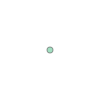

In [578]:
Point(point)

## buffer 生成有半径的圆

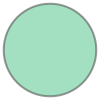

In [579]:
patch = Point(0.0, 0.0).buffer(10.0)
patch

# LineString

ineString构造函数采用2个或更多（x，y[，z]）点元组的有序序列

构造的LineString对象表示点之间的一个或多个连接的线性样条曲线。允许按顺序重复点，但可能会导致性能损失，应避免。线串可以交叉（即复杂而不简单）

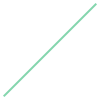

In [580]:
line = LineString([(0, 0), (1, 1)])
line

## LineString的面积为0，长度不为0

In [581]:
line.area

0.0

In [582]:
line.length

1.4142135623730951

## LineString的边界是 (minx, miny, maxx, maxy) 的元组

In [583]:
line.bounds

(0.0, 0.0, 1.0, 1.0)

## LineString的坐标值可以使用coords获取

In [584]:
list(line.coords)

[(0.0, 0.0), (1.0, 1.0)]

## LineString构造函数还接受另一个LineString实例，从而生成一个副本

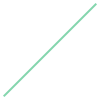

In [585]:
LineString(line)

# LinearRing

通过在第一个和最后一个索引中传递相同的值，可以显式地闭合序列。否则，将通过将第一个元组复制到最后一个索引来隐式闭合序列。与LineString一样，允许有序序列中的重复点，但可能会导致性能损失，因此应该避免。线迹不能交叉，也不能单点接触

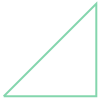

In [586]:
ring = LinearRing([(0, 0), (2, 2), (2, 0)])
ring

## LinearRing的面积为0，长度不为0

In [587]:
ring.area

0.0

In [588]:
ring.length

6.82842712474619

## LinearRing的边界是 (minx, miny, maxx, maxy) 的元组

In [589]:
ring.bounds

(0.0, 0.0, 2.0, 2.0)

## LinearRing的坐标值可以使用coords获取

In [590]:
list(ring.coords)

[(0.0, 0.0), (2.0, 2.0), (2.0, 0.0), (0.0, 0.0)]

## LinearRing构造函数还接受另一个LinearRing实例，从而生成一个副本

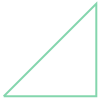

In [591]:
LinearRing(ring)

## contains 是否包含其他值

In [592]:
ring.contains(Point(1, 1))

True

In [593]:
ring.contains([Point(1, 1), Point(1, -1)])

array([ True, False])

In [594]:
# 包含边界
ring.contains(Point(2, 2))

True

# Polygon

Polygon构造函数接受两个位置参数。第一个是（x，y[，z]）点元组的有序序列，其处理方式与LinearRing完全相同。第二个是一个可选的无序的环状序列，指定了特征的内部边界或“洞”

有效多边形的环不能相互交叉，且只能接触一个点。同样，Shapely不会阻止无效特性的创建，但是在操作它们时会引发异常

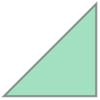

In [595]:
polygon = Polygon([(0, 0), (2, 2), (2, 0)])
polygon

## 通过 box(minx, miny, maxx, maxy, ccw=True) 生成 Polygon

Polygon


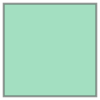

In [596]:
print(box(0.0, 0.0, 1.0, 1.0).geom_type)
box(0.0, 0.0, 1.0, 1.0)

## Polygon的面积和长度不为0

In [597]:
polygon.area

2.0

In [598]:
polygon.length

6.82842712474619

## Polygon的边界是(minx, miny, maxx, maxy)数组

In [599]:
polygon.bounds

(0.0, 0.0, 2.0, 2.0)

## boundary 返回边界

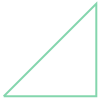

In [600]:
polygon.boundary

## Polygon的构成环通过exterior 和 interiors 属性获取

In [601]:
list(polygon.exterior.coords)

[(0.0, 0.0), (2.0, 2.0), (2.0, 0.0), (0.0, 0.0)]

In [602]:
list(polygon.interiors)

[]

## envelope oriented_envelope 返回外接最小矩形

(0.0, 0.0, 2.0, 2.0)


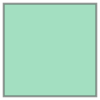

In [603]:
print(polygon.envelope.bounds)
polygon.envelope

(0.0, -0.9999999999999998, 2.9999999999999996, 1.9999999999999996)


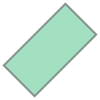

In [604]:
print(polygon.oriented_envelope.bounds)
polygon.oriented_envelope

(0.0, -0.9999999999999998, 2.9999999999999996, 1.9999999999999996)


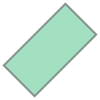

In [605]:
print(polygon.minimum_rotated_rectangle.bounds)
polygon.minimum_rotated_rectangle

# 复合类型

## Collections

几何对象的异构集合可能是由一些Shapely操作造成的。例如，两个LineStrings 可以沿一条线在一个点相交。为了表示这些结果，Shapely提供了类似冻结集的、不可变的几何对象集合。集合可以是同质（MultiPoint 等）或异构的

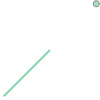

In [606]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
x = a.intersection(b)
x

In [607]:
x.geom_type

'GeometryCollection'

### GeometryCollection的成员可以通过geoms属性或迭代器协议in或list()进行访问

In [608]:
list(x.geoms)

[<LINESTRING (0 0, 1 1)>, <POINT (2 2)>]

## MultiPoint

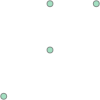

In [609]:
MultiPoint([Point(0, 0), Point(1, 1), Point(1, 2), Point(2, 2)])

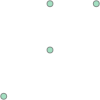

In [610]:
points = MultiPoint([(0, 0), (1, 1), (1, 2), (2, 2)])
points

### MultiPoint 的面积和长度属性为0

In [611]:
points.area

0.0

In [612]:
points.length

0.0

### 其 x-y 边界范围是(minx, miny, maxx, maxy) 元组

In [613]:
points.bounds

(0.0, 0.0, 2.0, 2.0)

In [614]:
points.geom_type

'MultiPoint'

### 它的成员是Point的实例，可以通过geoms属性或迭代器协议in或list()进行访问

In [615]:
list(points.geoms)

[<POINT (0 0)>, <POINT (1 1)>, <POINT (1 2)>, <POINT (2 2)>]

### 构造函数还接受另一个 MultiPoint 实例或无序的点实例序列，从而生成副本

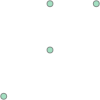

In [616]:
MultiPoint(points)

## MultiLineString

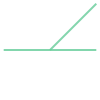

In [617]:
MultiLineString([LineString([(0, 0), (1, 1)]), LineString([(-1, 0), (1, 0)])])


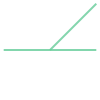

In [618]:
lines = MultiLineString([((0, 0), (1, 1)), ((-1, 0), (1, 0))])
lines

### MultiLineString 的面积为0,长度不为0

In [619]:
lines.area

0.0

In [620]:
lines.length

3.414213562373095

### 其 x-y 边界范围是(minx, miny, maxx, maxy) 元组

In [621]:
lines.bounds

(-1.0, 0.0, 1.0, 1.0)

### 它的成员是LineString的实例，可以通过geoms属性或迭代器协议in或list()进行访问

In [622]:
list(lines.geoms)

[<LINESTRING (0 0, 1 1)>, <LINESTRING (-1 0, 1 0)>]

### 构造函数还接受多行字符串的另一个实例或无序的 LineString 实例序列，从而生成副本

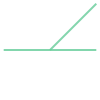

In [623]:
MultiLineString(lines)

## MultiPolygon

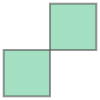

In [624]:
polygons = MultiPolygon([Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]), Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])])
polygons

### MultiPolygon 的面积和长度都不为0

In [625]:
polygons.area

2.0

In [626]:
polygons.length

8.0

### 其 x-y 边界范围是(minx, miny, maxx, maxy) 元组

In [627]:
polygons.bounds

(0.0, 0.0, 2.0, 2.0)

### 它的成员是Polygon的实例，可以通过geoms属性或迭代器协议in或list()进行访问

In [628]:
list(polygons.geoms)

[<POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))>, <POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))>]

### 构造函数还接受另一个 MultiPolygon 实例，从而生成副本

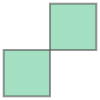

In [629]:
MultiPolygon(polygons)

# Predicates and Relationships

## Unary Predicates

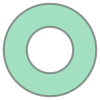

In [630]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut

### `object.has_z`

Returns True if the feature has not only x and y, but also z coordinates for 3D (or so-called, 2.5D) geometries.

如果要素不仅具有 x 和 y，而且还具有 3D（或所谓的 2.5D）几何图形的 z 坐标，则返回 True。

In [631]:
donut.has_z

False

### `object.is_closed`

Returns True if a linestring’s first and last points are equal.

如果线串的第一个点和最后一个点相等，则返回 True。

In [632]:
donut.is_closed

False

### `object.is_empty`

Returns True if the feature’s interior and boundary (in point set terms) coincide with the empty set.

如果要素的内部和边界（以点集术语）与空集重合，则返回 True。

In [633]:
donut.is_empty

False

### `object.is_ring`

Returns True if the feature is a closed and simple LineString. A closed feature’s boundary coincides with the empty set.

如果要素是封闭且简单的 LineString，则返回 True。 闭合特征的边界与空集重合。

In [634]:
donut.is_ring

False

### `object.is_simple`

Returns True if the feature does not cross itself.

如果该特征不与自身相交，则返回 True。

In [635]:
donut.is_simple

True

### `object.is_valid`

Returns True if a feature is “valid” in the sense of.

如果某个功能在某种意义上是“有效”，则返回 True。

In [636]:
donut.is_valid

True

## Binary Predicates

### `object.__eq__(other)` 精确匹配

Returns True if the two objects are of the same geometric type, and the coordinates of the two objects match precisely.

如果两个对象具有相同的几何类型，并且两个对象的坐标精确匹配，则返回 True。

### `object.equals(other)`

Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.

如果对象的集合论边界、内部和外部与另一个对象一致，则返回 True。

### `object.equals_exact(other, tolerance)`

Returns True if the object is within a specified tolerance.

如果对象在指定的容差范围内，则返回 True。

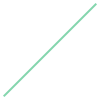

In [637]:
a = LineString([(0, 0), (1, 1)])
a

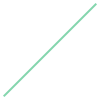

In [638]:
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
b

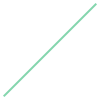

In [639]:
c = LineString([(0, 0), (0, 0), (1, 1)])
c

In [640]:
a == b, a.equals(b), a.equals_exact(b, 1)

(False, True, False)

In [641]:
b == c, b.equals(c), b.equals_exact(c, 1)

(False, True, True)

### `object.contains(other)` 包含返回True, 不包括边界

Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.

如果 other 的点均不位于对象的外部且 other 的内部至少有一个点位于对象的内部，则返回 True。

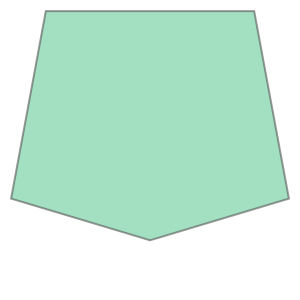

In [642]:
polygon = Polygon([(50, 80), (250, 20), (450, 80), (400, 350), (100, 350)])
polygon

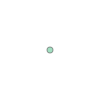

In [643]:
point1 = Point(0, 0)
point1

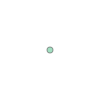

In [644]:
point2 = Point(100, 100)
point2

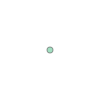

In [645]:
point3 = Point(50, 80)  # 边界点
point3

In [646]:
polygon.contains(point1)

False

In [647]:
polygon.contains(point2)

True

In [648]:
polygon.contains(point3)    # 点在边界上不算

False

In [649]:
polygon.contains([point1, point2, point3])

array([False,  True, False])

### `object.covers(other)` 包含返回True, 包括边界

Returns True if every point of other is a point on the interior or boundary of object. This is similar to object.contains(other) except that this does not require any interior points of other to lie in the interior of object.

如果 other 的每个点都是对象内部或边界上的点，则返回 True。 这与 object.contains(other) 类似，只不过它不要求 other 的任何内部点位于 object 的内部。

In [650]:
polygon.covers(point1)

False

In [651]:
polygon.covers(point2)

True

In [652]:
polygon.covers(point3)  # 边界上的点算是

True

In [653]:
polygon.covers([point1, point2, point3])

array([False,  True,  True])

### `object.covered_by(other)` 反方向的 convers

Returns True if every point of object is a point on the interior or boundary of other. This is equivalent to other.covers(object).

如果对象的每个点都是其他点的内部或边界上的点，则返回 True。 这相当于 other.covers(object)。

In [654]:
point1.covered_by(polygon)

False

In [655]:
point2.covered_by(polygon)

True

In [656]:
point3.covered_by(polygon)

True

### `object.crosses(other)` 相交返回True,包含不算

Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.

如果对象的内部与另一个对象的内部相交但不包含它，并且相交的尺寸小于其中一个或另一个的尺寸，则返回 True。

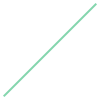

In [657]:
line1 = LineString([(0, 0), (2, 2)])
line1

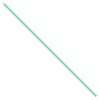

In [658]:
line2 = LineString([(0, 2), (2, 0)])
line2

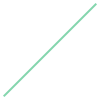

In [659]:
line3 = LineString([(0, 2), (2, 4)])
line3

In [660]:
line4 = LineString([(0, 0), (1, 1)])

In [661]:
line1.crosses(line2)

True

In [662]:
line1.crosses(line3)

False

In [663]:
line1.crosses(line4)    # 包含不算相交

False

### `object.disjoint(other)` 不相交返回True

Returns True if the boundary and interior of the object do not intersect at all with those of the other.

如果对象的边界和内部与另一个对象根本不相交，则返回 True。

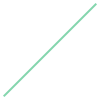

In [664]:
line1 = LineString([(0, 0), (2, 2)])
line1

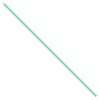

In [665]:
line2 = LineString([(0, 2), (2, 0)])
line2

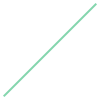

In [666]:
line3 = LineString([(0, 2), (2, 4)])
line3

In [667]:
line4 = LineString([(0, 0), (1, 1)])

In [668]:
line1.disjoint(line2)

False

In [669]:
line1.disjoint(line3)

True

In [670]:
line1.disjoint(line4)

False

### `object.intersects(other)` 相交返回True,包含也算

Returns True if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

如果对象的边界或内部以任何方式与另一个对象的边界或内部相交，则返回 True。

换句话说，如果几何对象有任何共同的边界或内点，则它们相交。

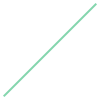

In [671]:
line1 = LineString([(0, 0), (2, 2)])
line1

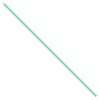

In [672]:
line2 = LineString([(0, 2), (2, 0)])
line2

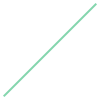

In [673]:
line3 = LineString([(0, 2), (2, 4)])
line3

In [674]:
line4 = LineString([(0, 0), (1, 1)])

In [675]:
line1.intersects(line2)

True

In [676]:
line1.intersects(line3)

False

In [677]:
line1.intersects(line4)    # 包含算相交

True

### `object.overlaps(other)` 重叠但不完全覆盖返回True

Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

如果几何图形具有多个但不是所有的公共点、具有相同的维度，并且几何图形内部的交集具有与几何图形本身相同的维度，则返回 True。

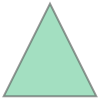

In [678]:
polygon1 = Polygon([(0, 0), (2, 0), (1, 2)])
polygon1

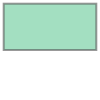

In [679]:
# 重叠但不完全覆盖
polygon2 = Polygon([(0, 0), (2, 0), (2, 1), (0, 1)])
polygon2

In [680]:
polygon1.overlaps(polygon2)

True

In [681]:
polygon2.overlaps(polygon1)

True

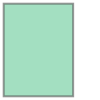

In [682]:
# 完全覆盖
polygon3 = Polygon([(-1, -1), (2, -1), (2, 3), (-1, 3)])
polygon3

In [683]:
polygon1.overlaps(polygon3)

False

In [684]:
polygon3.overlaps(polygon1)

False

### `object.touches(other)`

Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.

Overlapping features do not therefore touch, another potential “gotcha”. For example, the following lines touch at (1, 1), but do not overlap.

如果对象至少有一个共同点并且其内部不与另一个对象的任何部分相交，则返回 True。

因此，重叠的功能不会相互接触，这是另一个潜在的“陷阱”。 例如，以下线条在 (1, 1) 处相交，但不重叠。

In [685]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(1, 1), (2, 2)])
a.touches(b)

True

### `object.within(other)`

Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

This applies to all types and is the inverse of contains().

Used in a sorted() key, within() makes it easy to spatially sort objects. Let’s say we have 4 stereotypic features: a point that is contained by a polygon which is itself contained by another polygon, and a free spirited point contained by none

如果对象的边界和内部仅与另一个对象的内部（而不是其边界或外部）相交，则返回 True。

这适用于所有类型，并且是 contains() 的逆函数。

在sorted()键中使用within()可以轻松地对对象进行空间排序。 假设我们有 4 个刻板特征：一个被一个多边形包含的点，该多边形本身又被另一个多边形包含，以及一个不包含任何多边形的自由点

In [686]:
a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

In [687]:
# and that copies of these are collected into a list
features = [c, a, d, b, c]

In [688]:
# that we’d prefer to have ordered as [d, c, c, b, a] in reverse containment order. As explained in the Python Sorting HowTo, we can define a key function that operates on each list element and returns a value for comparison. Our key function will be a wrapper class that implements __lt__() using Shapely’s binary within() predicate.
class Within:
    def __init__(self, o):
        self.o = o
    def __lt__(self, other):
        return self.o.within(other.o)

In [689]:
# As the howto says, the less than comparison is guaranteed to be used in sorting. That’s what we’ll rely on to spatially sort. Trying it out on features d and c, we see that it works.
Within(d) < Within(c)

False

In [690]:
# It also works on the list of features, producing the order we want.
[d, c, c, b, a] == sorted(features, key=Within, reverse=True)

True